In [1]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, y = load_diabetes(return_X_y=True)
X.shape, y.shape

((442, 10), (442,))

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [4]:
def gb_predict(X, trees_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании
    # прибавляются с шагом eta
    
    predictions = np.zeros(X.shape[0])
    for i, x in enumerate(X):
        prediction = 0
        for alg in trees_list:
            prediction += eta * alg.predict([x])[0]
        predictions[i] = prediction
        
    predictions = np.array(
        [sum([eta * alg.predict([x])[0] for alg in trees_list]) for x in X]
    )

    return predictions

In [5]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [6]:
def residual(y, z):
    return - (z - y)

In [7]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, residual(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [8]:
# Число деревьев в ансамбле
n_trees = 10

# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

In [9]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, eta):
    train_prediction = gb_predict(X_train, trees, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [10]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, eta)

Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 1090.967566665641
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 1 на тестовой выборке: 5148.279499120257


In [11]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

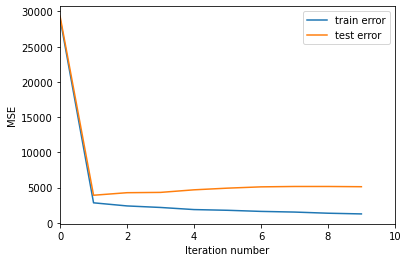

In [12]:
get_error_plot(n_trees, train_errors, test_errors)

Ошибка алгоритма из 5 деревьев глубиной 2     с шагом 1 на тренировочной выборке: 2489.1731301452073
Ошибка алгоритма из 5 деревьев глубиной 2     с шагом 1 на тестовой выборке: 4448.783690756354


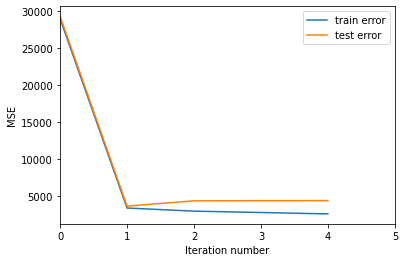

Wall time: 1.42 s


In [13]:
%%time
# Число деревьев в ансамбле
n_trees = 5

# Максимальная глубина деревьев
max_depth = 2

# Шаг
eta = 1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

evaluate_alg(X_train, X_test, y_train, y_test, trees, eta)

get_error_plot(n_trees, train_errors, test_errors)

Ошибка алгоритма из 10 деревьев глубиной 2     с шагом 1 на тренировочной выборке: 2005.6522037565014
Ошибка алгоритма из 10 деревьев глубиной 2     с шагом 1 на тестовой выборке: 3969.409146352393


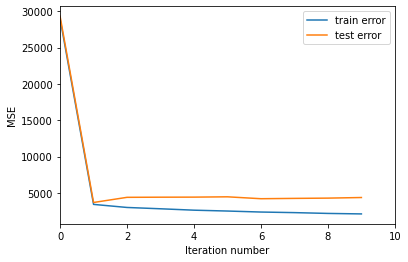

Wall time: 5.06 s


In [14]:
%%time
# Число деревьев в ансамбле
n_trees = 10

# Максимальная глубина деревьев
max_depth = 2

# Шаг
eta = 1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

evaluate_alg(X_train, X_test, y_train, y_test, trees, eta)

get_error_plot(n_trees, train_errors, test_errors)

Ошибка алгоритма из 15 деревьев глубиной 2     с шагом 1 на тренировочной выборке: 1750.678251718613
Ошибка алгоритма из 15 деревьев глубиной 2     с шагом 1 на тестовой выборке: 3773.9636802527166


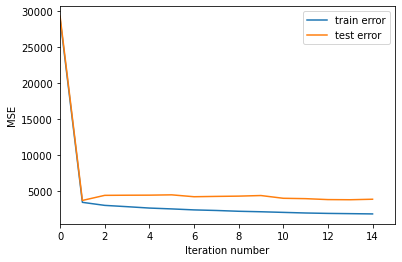

Wall time: 9.68 s


In [15]:
%%time
# Число деревьев в ансамбле
n_trees = 15

# Максимальная глубина деревьев
max_depth = 2

# Шаг
eta = 1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

evaluate_alg(X_train, X_test, y_train, y_test, trees, eta)

get_error_plot(n_trees, train_errors, test_errors)

Ошибка алгоритма из 30 деревьев глубиной 2     с шагом 1 на тренировочной выборке: 1041.8686396530354
Ошибка алгоритма из 30 деревьев глубиной 2     с шагом 1 на тестовой выборке: 4792.89392497802


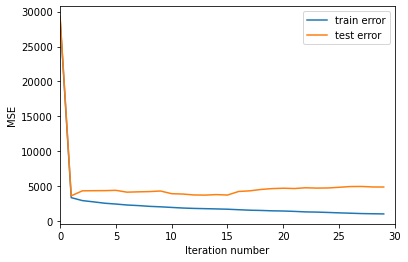

Wall time: 36.3 s


In [16]:
%%time
# Число деревьев в ансамбле
n_trees = 30

# Максимальная глубина деревьев
max_depth = 2

# Шаг
eta = 1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

evaluate_alg(X_train, X_test, y_train, y_test, trees, eta)

get_error_plot(n_trees, train_errors, test_errors)

Ошибка алгоритма из 30 деревьев глубиной 4     с шагом 1 на тренировочной выборке: 20.66503108700059
Ошибка алгоритма из 30 деревьев глубиной 4     с шагом 1 на тестовой выборке: 5324.275316064958


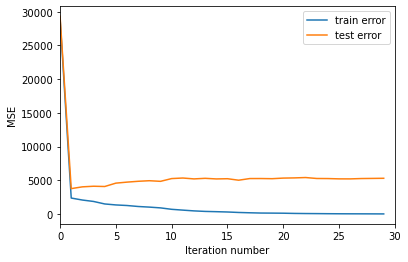

Wall time: 36.6 s


In [17]:
%%time
# Число деревьев в ансамбле
n_trees = 30

# Максимальная глубина деревьев
max_depth = 4

# Шаг
eta = 1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

evaluate_alg(X_train, X_test, y_train, y_test, trees, eta)

get_error_plot(n_trees, train_errors, test_errors)

Ошибка алгоритма из 60 деревьев глубиной 4     с шагом 1 на тренировочной выборке: 0.11307850054425846
Ошибка алгоритма из 60 деревьев глубиной 4     с шагом 1 на тестовой выборке: 5370.439165634397


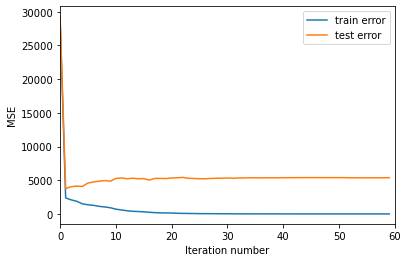

Wall time: 2min 24s


In [18]:
%%time
# Число деревьев в ансамбле
n_trees = 60

# Максимальная глубина деревьев
max_depth = 4

# Шаг
eta = 1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

evaluate_alg(X_train, X_test, y_train, y_test, trees, eta)

get_error_plot(n_trees, train_errors, test_errors)

Ошибка алгоритма из 60 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 26.732919589397405
Ошибка алгоритма из 60 деревьев глубиной 3     с шагом 1 на тестовой выборке: 7213.652007661156


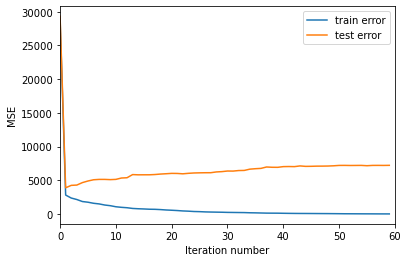

Wall time: 2min 24s


In [19]:
%%time
# Число деревьев в ансамбле
n_trees = 60

# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

evaluate_alg(X_train, X_test, y_train, y_test, trees, eta)

get_error_plot(n_trees, train_errors, test_errors)

Ошибка алгоритма из 20 деревьев глубиной 2     с шагом 1 на тренировочной выборке: 1493.5318745515235
Ошибка алгоритма из 20 деревьев глубиной 2     с шагом 1 на тестовой выборке: 4749.136477142496


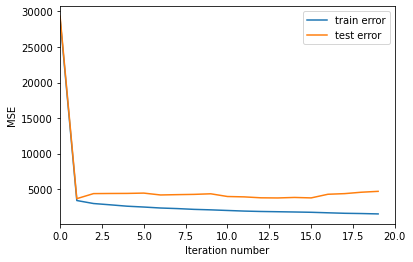

Wall time: 16.4 s


In [20]:
%%time
# Число деревьев в ансамбле
n_trees = 20

# Максимальная глубина деревьев
max_depth = 2

# Шаг
eta = 1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

evaluate_alg(X_train, X_test, y_train, y_test, trees, eta)

get_error_plot(n_trees, train_errors, test_errors)

### Вывод:
С увелиением числв деревьев в ансамбле ошибка на тестовой выборке падает до определенного уровня, а потом стабилизируется, ошибка на обучающей выборке продолжает падать. Увеличивать число деревев в ансамбле после достижения этого уровня нецелесообразно


С увелиением числв деревьев в ансамбле ошибка на тестовой выборке падает до определенного уровня, а потом стабилизируется, ошибка на обучающей выборке продолжает падать. Увеличивать число деревев в ансамбле после достижения этого уровня нецелесообразно